# Capstone: Data Wrangling/Cleaning

In this section I will be wrangling and cleaning the data. This section would typically involve some form of webscraping application but since I'll be using the dataset provided by http://www.rovit.ua.es/dataset/traffic/ that will not be necessary.
Also given that I will be working with a image dataset, there won't be any need for typical cleaning methods such as filling in NaNs and converting data types.

In [1]:
#imports that will be used in this notebook
from PIL import Image
import glob
from pathlib import Path

In [2]:
#this function will load the images from the dataset directory and save the modified images in a new directory
def load_process_image(path):
    #load image
    img = Image.open(path)
    
    # create path to save files to
    edited_path = "edited_images/final_{}.jpg".format(path.stem)

    # output to monitor the process
    print("Modifying {} and saving results to {}.".format(path, edited_path))
    
    # converting image into greyscale
    grey_img = img.convert("L")
    
    # resizing image to 500 X 500 pixels
    final_image = grey_img.resize((500, 500))
    
    # saving final image in new directory
    final_image.save(edited_path)

In [3]:
# for loop over image paths
for img_path in glob.glob('Capstone/Dataset/SampleFiles/*.jpg'):
    load_process_image(Path(img_path))

Modifying Capstone\Dataset\SampleFiles\bus_internet09_026837.jpg and saving results to edited_images/final_bus_internet09_026837.jpg.
Modifying Capstone\Dataset\SampleFiles\bus_internet09_026881.jpg and saving results to edited_images/final_bus_internet09_026881.jpg.
Modifying Capstone\Dataset\SampleFiles\bus_internet09_026925.jpg and saving results to edited_images/final_bus_internet09_026925.jpg.
Modifying Capstone\Dataset\SampleFiles\bus_internet09_027010.jpg and saving results to edited_images/final_bus_internet09_027010.jpg.
Modifying Capstone\Dataset\SampleFiles\bus_internet09_027054.jpg and saving results to edited_images/final_bus_internet09_027054.jpg.
Modifying Capstone\Dataset\SampleFiles\bus_internet09_027098.jpg and saving results to edited_images/final_bus_internet09_027098.jpg.
Modifying Capstone\Dataset\SampleFiles\bus_internet09_027142.jpg and saving results to edited_images/final_bus_internet09_027142.jpg.
Modifying Capstone\Dataset\SampleFiles\bus_internet09_027194.j

Modifying Capstone\Dataset\SampleFiles\motorbike_internet01_000061.jpg and saving results to edited_images/final_motorbike_internet01_000061.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet01_000111.jpg and saving results to edited_images/final_motorbike_internet01_000111.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet01_000179.jpg and saving results to edited_images/final_motorbike_internet01_000179.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet01_000223.jpg and saving results to edited_images/final_motorbike_internet01_000223.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet01_000284.jpg and saving results to edited_images/final_motorbike_internet01_000284.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet03_000008.jpg and saving results to edited_images/final_motorbike_internet03_000008.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet03_000052.jpg and saving results to edited_images/final_motorbike_i

Modifying Capstone\Dataset\SampleFiles\motorbike_internet04_002498.jpg and saving results to edited_images/final_motorbike_internet04_002498.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet04_002544.jpg and saving results to edited_images/final_motorbike_internet04_002544.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet04_002595.jpg and saving results to edited_images/final_motorbike_internet04_002595.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet04_002653.jpg and saving results to edited_images/final_motorbike_internet04_002653.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet04_002705.jpg and saving results to edited_images/final_motorbike_internet04_002705.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet04_002750.jpg and saving results to edited_images/final_motorbike_internet04_002750.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet04_002796.jpg and saving results to edited_images/final_motorbike_i

Modifying Capstone\Dataset\SampleFiles\motorbike_internet06_002142.jpg and saving results to edited_images/final_motorbike_internet06_002142.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet06_002231.jpg and saving results to edited_images/final_motorbike_internet06_002231.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet06_002327.jpg and saving results to edited_images/final_motorbike_internet06_002327.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet06_002371.jpg and saving results to edited_images/final_motorbike_internet06_002371.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet06_002416.jpg and saving results to edited_images/final_motorbike_internet06_002416.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet06_002460.jpg and saving results to edited_images/final_motorbike_internet06_002460.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet06_002540.jpg and saving results to edited_images/final_motorbike_i

Modifying Capstone\Dataset\SampleFiles\motorbike_internet08_001931.jpg and saving results to edited_images/final_motorbike_internet08_001931.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet08_001975.jpg and saving results to edited_images/final_motorbike_internet08_001975.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet08_002026.jpg and saving results to edited_images/final_motorbike_internet08_002026.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet08_002079.jpg and saving results to edited_images/final_motorbike_internet08_002079.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet08_002135.jpg and saving results to edited_images/final_motorbike_internet08_002135.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet08_002179.jpg and saving results to edited_images/final_motorbike_internet08_002179.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet08_002223.jpg and saving results to edited_images/final_motorbike_i

Just for demostration purposes, we can now see one of the original images and its modified version.

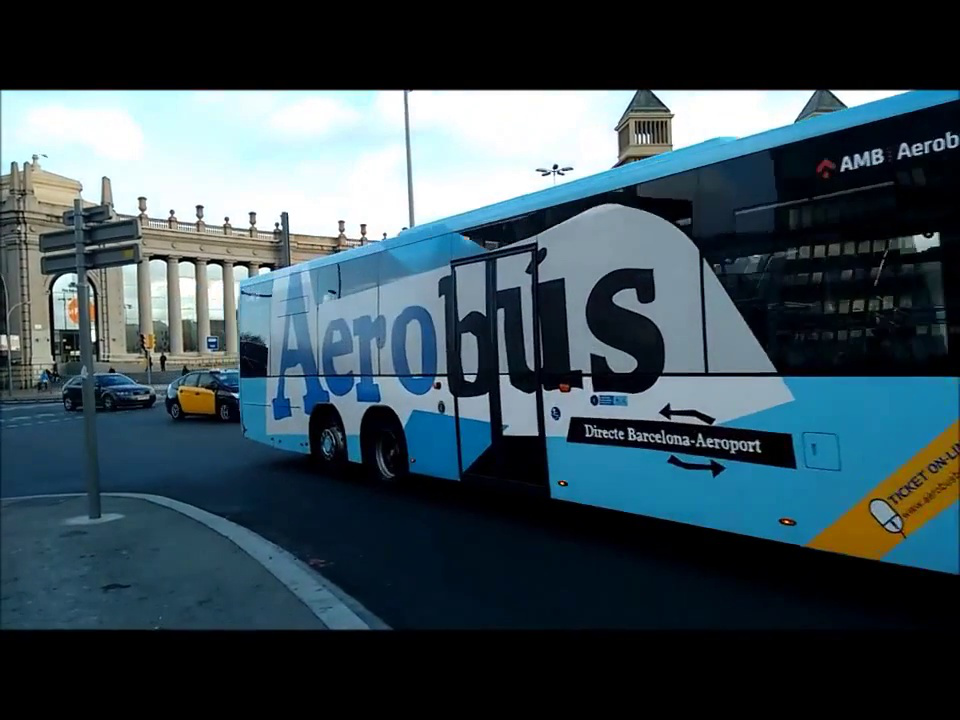

In [4]:
#first the original image
filename = 'bus_internet09_026925'
img = Image.open('Capstone/Dataset/SampleFiles/{}.jpg'.format(filename))
img

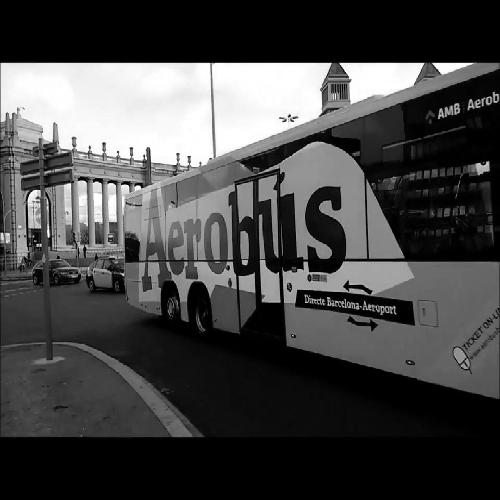

In [5]:
# Now the modified verision
img_mod = Image.open('edited_images/final_{}.jpg'.format(filename))
img_mod